In [14]:
import h5py
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.layers import Conv2D,Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [3]:
file=h5py.File('SVHN_single_grey1.h5','r')

ls=list(file.keys())
print('datasets : \n',ls)

datasets : 
 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


In [4]:
x1test=list(file.keys())[0]
x1train=list(file.keys())[1]
x1val=list(file.keys())[2]
y1test=list(file.keys())[3]
y1train=list(file.keys())[4]
y1val=list(file.keys())[5]

In [5]:
# print(type(file[data]))

In [6]:
x1test_array=file[x1test][()]
x1train_array=file[x1train][()]
x1val_array=file[x1val][()]
y1test_array=file[y1test][()]
y1train_array=file[y1train][()]
y1val_array=file[y1val][()]

# print(x1test_array)

In [7]:
# print(ds_array.shape)
print(x1test_array.shape)

(18000, 32, 32)


In [8]:
print(x1train_array.shape)

(42000, 32, 32)


In [9]:
print(x1val_array.shape)

(60000, 32, 32)


In [10]:
print(y1test_array.shape)

(18000,)


In [11]:
print(y1train_array.shape)

(42000,)


In [12]:
print(y1val_array.shape)

(60000,)


In [123]:
# x11=x1test_array
# x11_r=np.array(x11)
# x11_r

In [13]:
# xr1_trainarray=x1train_array
# xr1_trainarray=np.reshape( xr1_trainarray,( xr1_trainarray.shape[0]))/255.0
    
xr1_trainarray=x1train_array
print(xr1_trainarray)

[[[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
  [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
  [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
  ...
  [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
  [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
  [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]

 [[ 86.9591  87.0685  88.3735 ...  91.8014  89.7477  92.5302]
  [ 86.688   86.9114  87.4337 ...  90.7306  87.204   88.5629]
  [ 85.9654  85.8145  85.9239 ...  63.8626  59.8199  54.8805]
  ...
  [ 90.2236  91.0448  93.4637 ...  55.3535  48.5822  44.0557]
  [ 90.6427  90.4039  90.937  ...  78.2696  77.4977  74.27  ]
  [ 88.0236  88.1977  86.6709 ...  75.2206  76.6396  79.2865]]

 [[123.125  125.8581 122.0757 ... 123.5747 124.1186 123.3144]
  [121.1683 124.1294 117.4613 ... 115.6078 119.5751 122.8306]
  [124.6132 121.1019 109.6623 ... 111.1783 119.7923 124.7595]
  ...
  [135.1391 127.3679 117.754  ...  95.0919 105.5

In [142]:
from sklearn.preprocessing import MinMaxScaler

In [143]:
scaler=MinMaxScaler()

In [145]:
scaler.fit_transform(xr1_trainarray)

ValueError: Found array with dim 3. MinMaxScaler expected <= 2.

do obfuscate

In [2]:
file_name='../e.haque/SVHN_single_grey1.h5'
df=h5py.File(file_name,'r+')
data=np.array(df)

First we get the dataset

In [3]:
list(df.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

Converting Images to numpy array format

In [4]:
xtest=np.array(df['X_test'])
ytest=np.array(df['y_test'])
xval=np.array(df['X_val'])

xtrain=np.array(df['X_train'])
ytrain=np.array(df['y_train'])
yval=np.array(df['y_val'])

Looking at the input shape and data shape of images

In [8]:
xtrain[1]

array([[86.9591, 87.0685, 88.3735, ..., 91.8014, 89.7477, 92.5302],
       [86.688 , 86.9114, 87.4337, ..., 90.7306, 87.204 , 88.5629],
       [85.9654, 85.8145, 85.9239, ..., 63.8626, 59.8199, 54.8805],
       ...,
       [90.2236, 91.0448, 93.4637, ..., 55.3535, 48.5822, 44.0557],
       [90.6427, 90.4039, 90.937 , ..., 78.2696, 77.4977, 74.27  ],
       [88.0236, 88.1977, 86.6709, ..., 75.2206, 76.6396, 79.2865]],
      dtype=float32)

In [9]:
xtrain[5].shape

(32, 32)

In [28]:
xtrain.shape

(42000, 32, 32)

In [29]:
ytrain.shape

(42000,)

In [30]:
xtest.shape

(18000, 32, 32)

In [31]:
ytest.shape

(18000,)

In order to make calculation and Processing efficient we Normalize the data

In [33]:
xtrain=xtrain/255
xtest=xtest/255
xval=xval/255

image view 

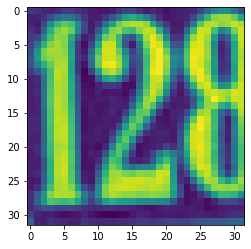

In [10]:
plt.imshow(xtrain[0])

We see that the images are RGB and has other colors around the edges. So, the plan is to create a 32X32X3 CNN Model with dense layers to recognize the digits with significant accuracy. 

1. First we create an Inoput Shape 32X32X3
2. We creade Hidden Layers
3. We look at the Features
4. We build the model based on the dataset with Hidden Layer, RELU, Convolution,Polling and Padding
5. from this we device the extraction layer
6. After creating model we train the model and fit the model.
7. Then we test the model for accuracy

Creating the model based on dataset and Image structure

- We are creating a 32 conv2D filter kernel
- We are creating a 64 conv 2D filter kernel
- We are creating Pooling, padding,Dropout
- Flatten
- Then Dense 64 layer
- Then Final output layer Dense 10 with softmax
- WE ave input layer 2 hidden layers and Ouput Layer

In [15]:
model=Sequential()
#Input Layer
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,1)))
model.add(MaxPooling2D((2,2)))
# Hillden Layer 1
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
#Hidden Layer 2
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)               

In [16]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [18]:
model.fit(xtrain,ytrain,epochs=15)

Epoch 1/15
1313/1313 [==============================] - 15s 11ms/step - loss: 2.4362 - accuracy: 0.0988
Epoch 2/15
1313/1313 [==============================] - 14s 11ms/step - loss: 2.3028 - accuracy: 0.0980
Epoch 3/15
1313/1313 [==============================] - 14s 11ms/step - loss: 2.3028 - accuracy: 0.0987
Epoch 4/15
1313/1313 [==============================] - 14s 11ms/step - loss: 2.3027 - accuracy: 0.1002
Epoch 5/15
1313/1313 [==============================] - 14s 11ms/step - loss: 2.3028 - accuracy: 0.1002
Epoch 6/15
1313/1313 [==============================] - 14s 11ms/step - loss: 2.3028 - accuracy: 0.1003
Epoch 7/15
1313/1313 [==============================] - 14s 11ms/step - loss: 2.3027 - accuracy: 0.0991
Epoch 8/15
1313/1313 [==============================] - 14s 11ms/step - loss: 2.3028 - accuracy: 0.1024
Epoch 9/15
1313/1313 [==============================] - 14s 11ms/step - loss: 2.3028 - accuracy: 0.1003
Epoch 10/15
1313/1313 [==============================] - 14s 11m

In [19]:
model.evaluate(xval,yval)

1875/1875 [==============================] - 7s 4ms/step - loss: 2.3027 - accuracy: 0.1000


[2.3026654720306396, 0.10000000149011612]

In [20]:
model.evaluate(xtest,ytest)

563/563 [==============================] - 2s 3ms/step - loss: 2.3028 - accuracy: 0.0982


[2.3027608394622803, 0.09822222590446472]

MinMax Scaler

In [22]:
scaler=MinMaxScaler()

x1train=scaler.fit_transform(xtrain.reshape(-1,xtrain.shape[-1])).reshape(xtrain.shape)
x1test=scaler.transform(xtest.reshape(-1,xtest.shape[-1])).reshape(xtest.shape)
x1val=scaler.transform(xval.reshape(-1,xval.shape[-1])).reshape(xval.shape)

Model for the scled data

In [23]:
model1=Sequential()
model1.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,1)))
model1.add(MaxPooling2D(2,2))
model1.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dense(10, activation='softmax'))

In [24]:
model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [25]:
model1.fit(x1train,ytrain,epochs=10)

Epoch 1/10
1313/1313 [==============================] - 15s 11ms/step - loss: 1.0547 - accuracy: 0.6673
Epoch 2/10
1313/1313 [==============================] - 14s 11ms/step - loss: 0.5515 - accuracy: 0.8485
Epoch 3/10
1313/1313 [==============================] - 14s 11ms/step - loss: 0.4820 - accuracy: 0.8675
Epoch 4/10
1313/1313 [==============================] - 14s 11ms/step - loss: 0.4323 - accuracy: 0.8797
Epoch 5/10
1313/1313 [==============================] - 15s 11ms/step - loss: 0.3944 - accuracy: 0.8916
Epoch 6/10
1313/1313 [==============================] - 14s 11ms/step - loss: 0.3636 - accuracy: 0.8976
Epoch 7/10
1313/1313 [==============================] - 14s 11ms/step - loss: 0.3355 - accuracy: 0.9033
Epoch 8/10
1313/1313 [==============================] - 15s 11ms/step - loss: 0.3118 - accuracy: 0.9098
Epoch 9/10
1313/1313 [==============================] - 15s 11ms/step - loss: 0.2910 - accuracy: 0.9168
Epoch 10/10
1313/1313 [==============================] - 15s 11m

In [27]:
model1.evaluate(x1val,yval)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.2919 - accuracy: 0.9184


[0.29186204075813293, 0.9184333086013794]

In [ ]:
model1

In [44]:
    # data=f.get('X_test')
    # dataset1=np.array(data)
    # print('Shape of dataset1: \n',dataset1.shape)
    
    n=f.get('X_test')
    n1=np.array(n)

ValueError: Not a location (invalid object ID)

In [54]:
list(f.keys())
x1=f['x']
y1=f['y']

df1=np.array(X1.value)
print(df1.shape)

TypeError: Not a location id (invalid object ID)